<a href="https://www.kaggle.com/code/divyanshukunwar/red-wine-data-analysis?scriptVersionId=116564780" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Just for fun more colors to notebook and visuals😅
GREEN = '\033[32m';RED = '\033[91m';BLUE = '\033[94m';RESET = '\033[0m'
COLOR_PALLETE = ['#00876c','#fbb862','#afd17c','#d43d51','#fff18f','#ee7d4f','#64ad73']

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print('File Location : ',GREEN , os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

File Location :   /kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# Read and See the sample Data

In [2]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Features And Labels

In [3]:
features = df.columns[:-1].values
label = df.columns[-1]

# columns except last one are features
print(GREEN,"FEATURE LIST : ",RESET, features )
#last column is label
print(GREEN,"LABEL : ",RESET, label)

 FEATURE LIST :   ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
 LABEL :   quality


In [4]:
# let's check the null values
print(df.isna().sum())
print(GREEN , "\nThere is 0 null values in dataset")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
 
There is 0 null values in dataset


# Data distribution

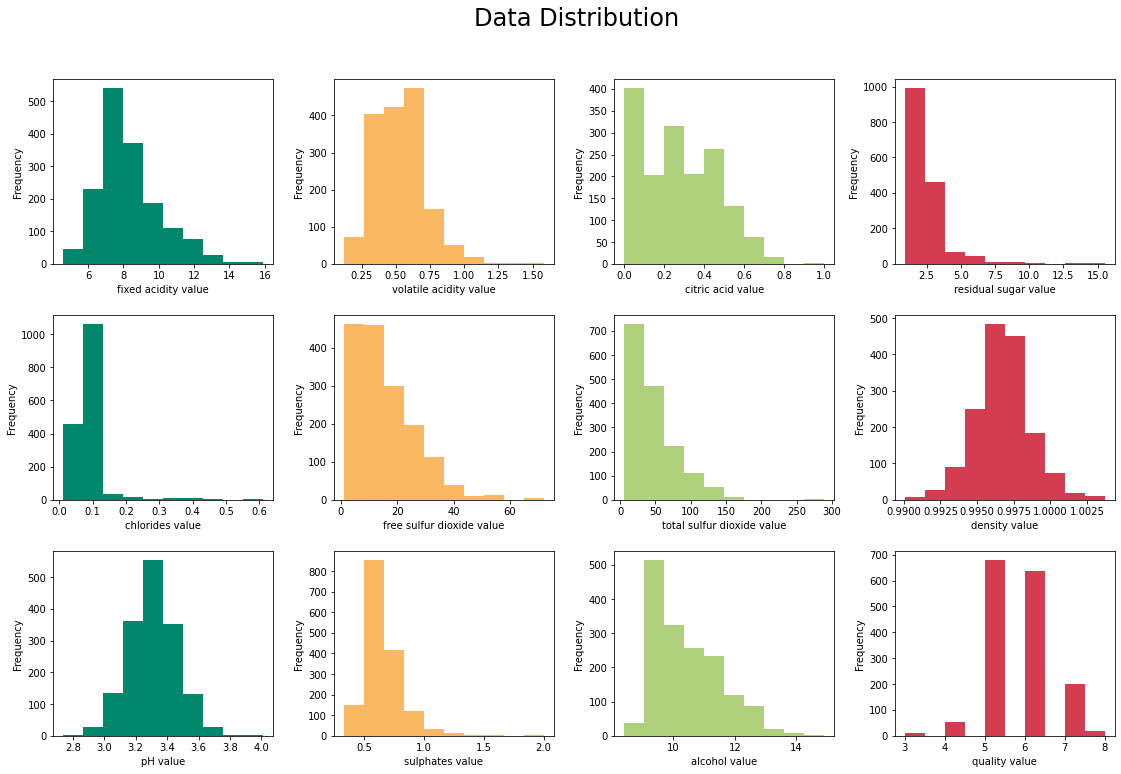

In [5]:
# there are total 16 columns (Features + Label)
fig , axes = plt.subplots(3,4, figsize=(16,11))
fig.suptitle("Data Distribution",fontsize=24)

# add padding to the plot
fig.tight_layout(pad=3.0)

# loop through columns
for i,j in enumerate(df.columns):
    
    # set xlabel and ylabel    
    axes[i//4][i%4].set_xlabel(j + " value")
    axes[i//4][i%4].set_ylabel("Frequency")
    
    #  create a histogram with color from color pallete
    axes[i//4][i%4].hist(df[j] , color=COLOR_PALLETE[i%4])
    
    # set the font size to 10 for labels and ticklabels
    for item in ([axes[i//4][i%4].xaxis.label, axes[i//4][i%4].yaxis.label] +
                axes[i//4][i%4].get_xticklabels() + axes[i//4][i%4].get_yticklabels()):
        item.set_fontsize(10)


# Data Correlation

In [6]:
import seaborn as sns

In [7]:
corr = df[features].corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


<AxesSubplot:>

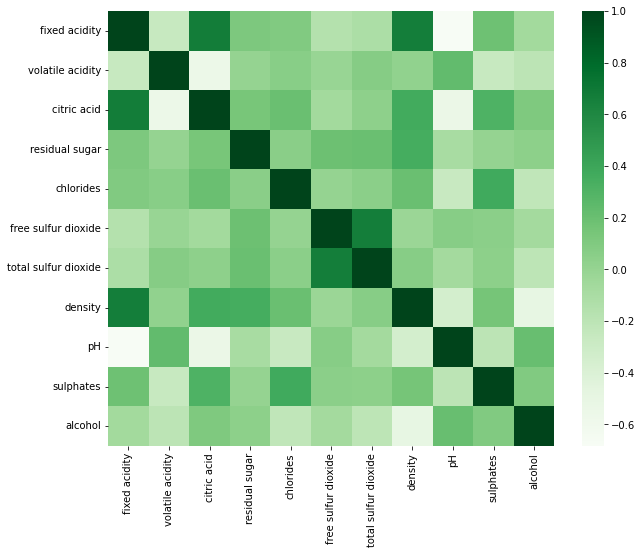

In [8]:
# let see the corelation between features 
fig , ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,ax=ax, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Greens')

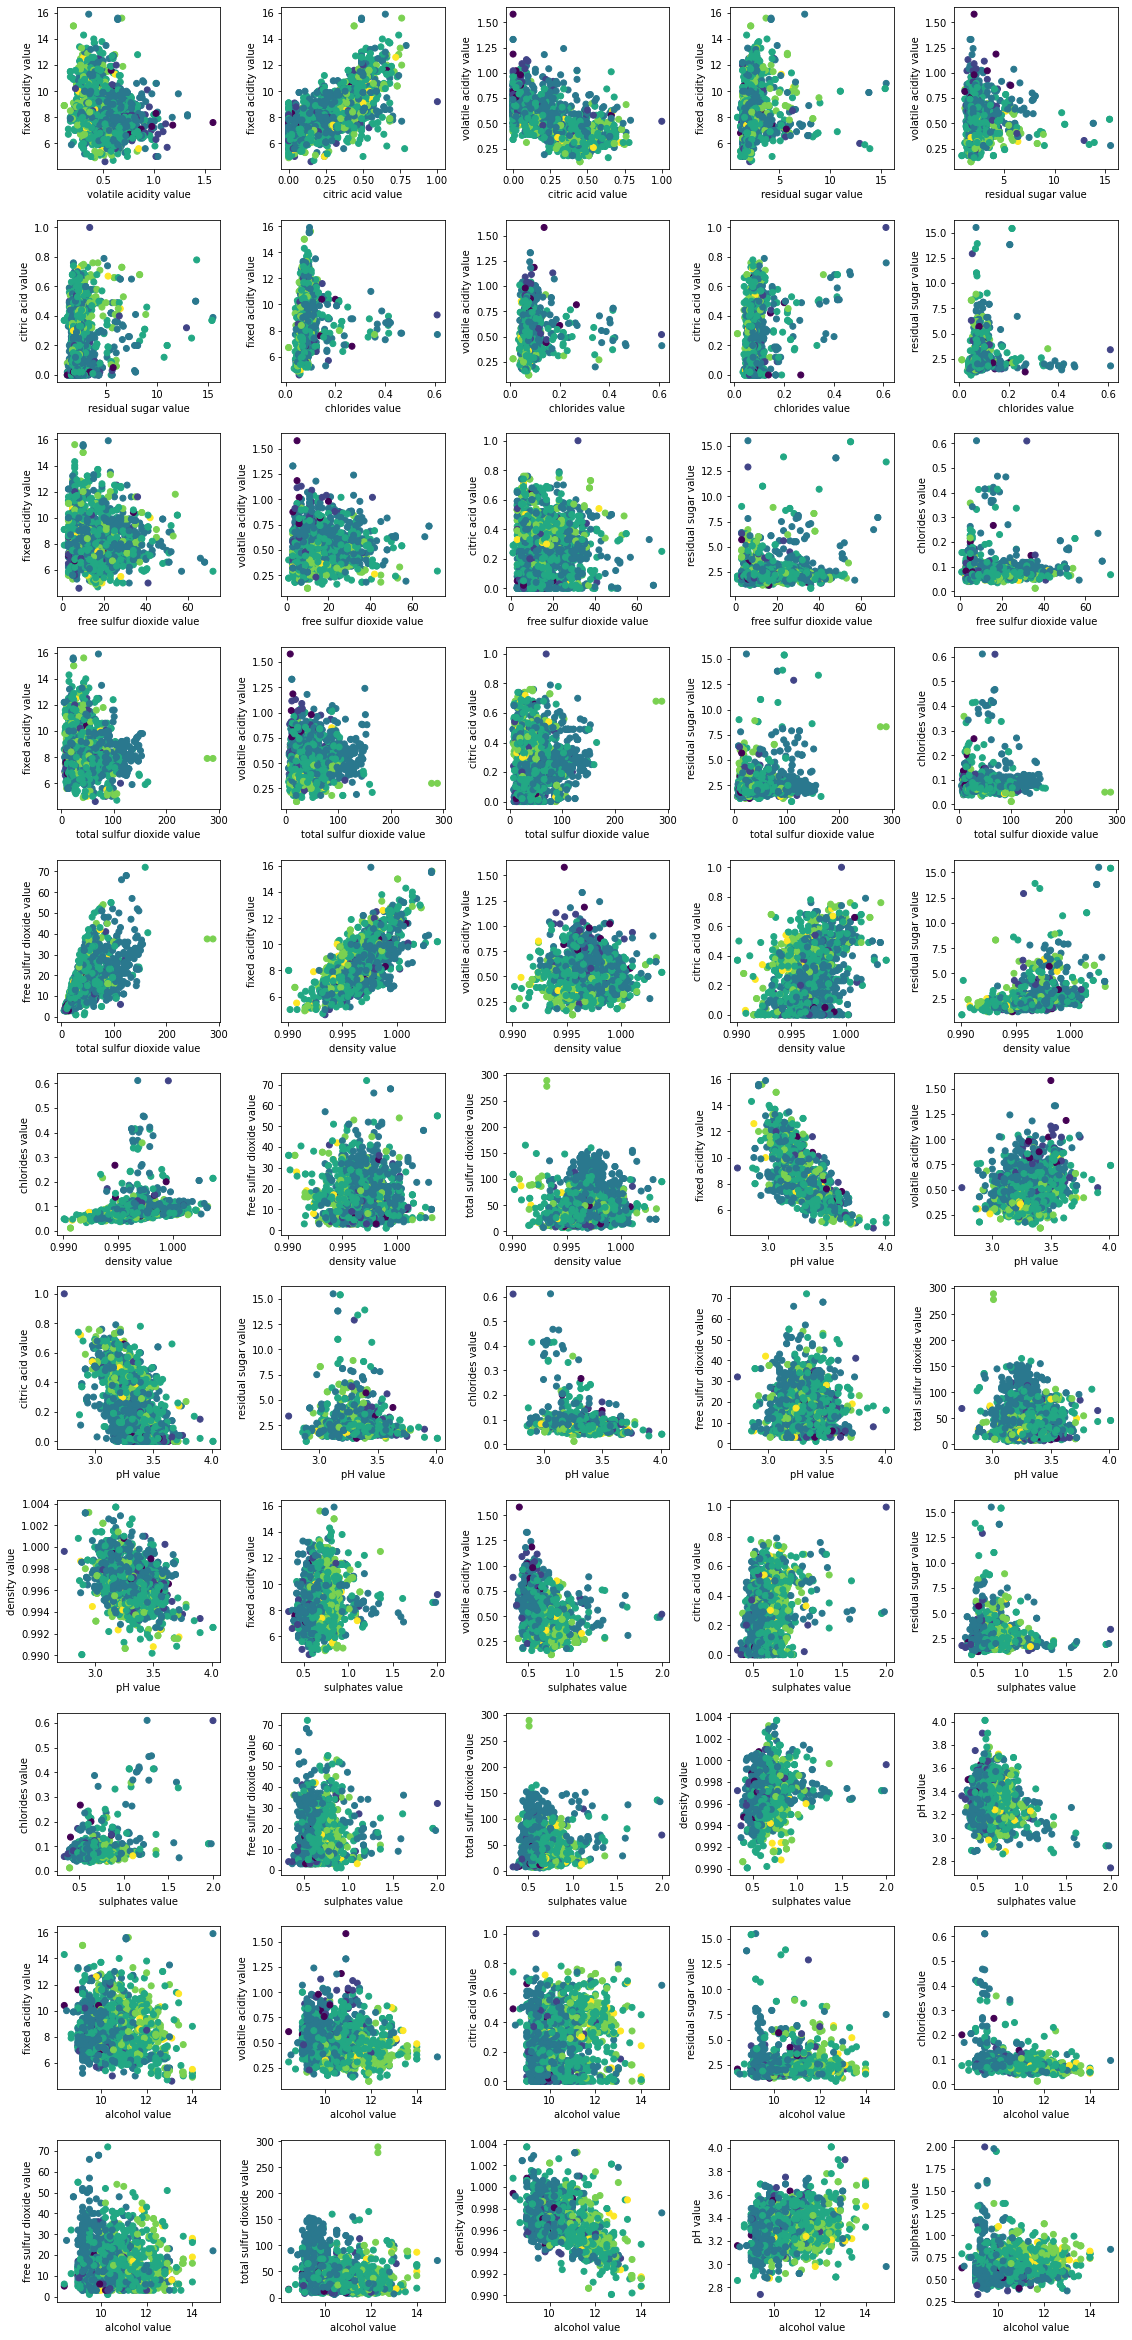

In [9]:
fig , axes = plt.subplots(11,5, figsize=(16,33))
fig.tight_layout(pad=3.0)

n = 0
for i,j in enumerate(df[features].columns):
    for k,l in enumerate(df[features].columns[:i]):
        axes[n//5][n%5].set_xlabel(j + " value")
        axes[n//5][n%5].set_ylabel(l + " value")
        #scatter plot between every features
        axes[n//5][n%5].scatter(x=df[j], y=df[l] , c=df['quality'])
        n += 1

In [10]:
corr_with_label = df.corr()['quality']
corr_with_label

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [11]:
#plt.scatter(x=df['quality'] , y=df['alcohol'])